# Layered Charts

A `LayeredChart` allows you to stack multiple individual charts on top of each other as layers. For example, this could be used to create a chart with both lines and points.

## Imports

In [1]:
import altair as alt
import pandas as pd
import numpy as np

In [8]:
# Uncomment/run this line to enable Altair in the classic notebook (not JupyterLab)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Data

In [9]:
np.random.seed(181)
data = pd.DataFrame({'x': np.arange(10),
                     'y':np.random.rand(10)})

In [3]:
data.head()

,x,y
0,0,0.524023
1,1,0.114090
2,2,0.570567
3,3,0.405836
4,4,0.182134


## Layered charts

Suppose you have defined two charts, and you would like to plot them on the same set of axes.
This comes up often when creating a compound chart with points and lines marking the same data.
For example:

In [10]:
layer1 = alt.Chart(data).mark_point().encode(
    x='x:Q',
    y='y:Q'
)

layer2 = alt.Chart(data).mark_line().encode(
    x='x:Q',
    y='y:Q'
)

The most succinct way to layer two charts is to use the ``+`` operator:

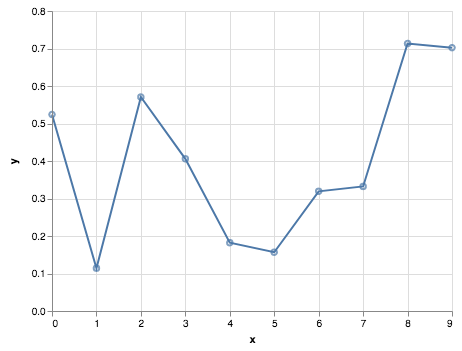

In [11]:
layer1 + layer2

One problem with this is that you end up specifying the encodings and data multiple times; you can instead build both layers from the same base chart:

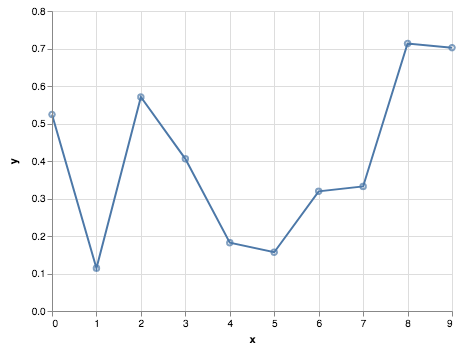

In [12]:
base = alt.Chart(data).encode(
    x='x:Q',
    y='y:Q'
)

base.mark_line() + base.mark_point()

To be a bit more explicit, you can use the ``alt.layer`` function, which produces the same thing:

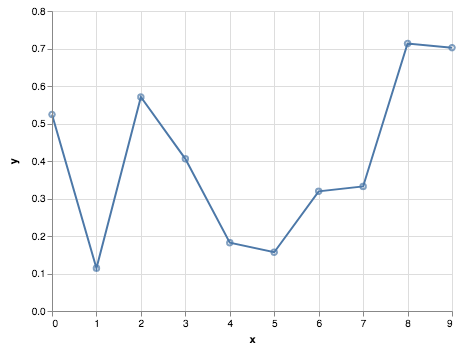

In [13]:
alt.layer(
    base.mark_line(),
    base.mark_point()
)